In [1]:
import glob

In [2]:
cc = pd.read_pickle('./data/C1_chart_prec.pcl')#['1995-10-01':'2011-09-30']

In [3]:
cc.head()

,date,P,Qual_days,flag
1952-10-01,1952-10-01,0.0,1.0,NaN
1952-10-02,1952-10-02,0.0,1.0,NaN
1952-10-03,1952-10-03,0.0,1.0,NaN
1952-10-04,1952-10-04,NaN,NaN,NaN
1952-10-05,1952-10-05,NaN,NaN,NaN


There is a pattern in the data where blanks are followed by a precip value that corresponds for that day the the preceeding blanks. Loop through all these values and distribute the precip over the preceeding blank spots

In [4]:
cc_fill = cc
for i in xrange(0,len(cc)):
    
    # skip entries that are only one day
    if (cc.ix[i].Qual_days == 1) or (np.isnan(cc.ix[i].Qual_days) == True):
        continue
    else:
        days = cc.ix[i].Qual_days
        strt = int(i-(days-1))
        cc.ix[strt:i+1].P = cc.ix[i].P/float(days)
        cc.ix[strt:i+1].Qual_days = 1.

/Users/barnhatb/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


## Read in Jemez Raws

In [5]:
jmz = pd.read_pickle('../RHESSys/jemez/data/Jemez_raws_wy2003_2015.pcl')

In [6]:
jmz.head()

,date,year,doy,dor,Tave,Tmax,Tmin,P
2002-10-01,10/01/2002,2002,274,1,10.4,17.2,5.6,2.29
2002-10-02,10/02/2002,2002,275,2,10.8,17.2,4.4,2.03
2002-10-03,10/03/2002,2002,276,3,5.6,10.0,0.6,0.00
2002-10-04,10/04/2002,2002,277,4,5.5,14.4,-3.9,0.00
2002-10-05,10/05/2002,2002,278,5,8.8,17.2,0.0,0.00


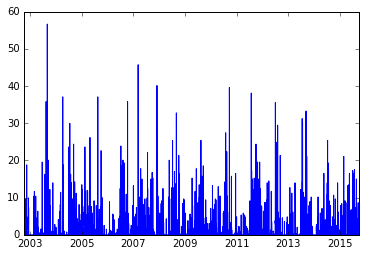

In [7]:
plt.plot(jmz.P)

In [8]:
sl = pd.read_pickle('./data/p301/p301_P.pcl')

In [9]:
print sl.index.min()
print sl.index.max()

2007-10-01 00:00:00
2014-09-30 00:00:00


In [10]:
sl.head()

,P_lower,P_upper
2007-10-01,0.0,0.0
2007-10-02,0.0,0.0
2007-10-03,0.0,0.0
2007-10-04,0.0,0.0
2007-10-05,5.0,14.0


In [11]:
cc_fill = cc_fill[sl.index.min():sl.index.max()].copy()
jmz = jmz[sl.index.min():sl.index.max()].copy()

In [12]:
cc_fill.describe()

,P,Qual_days,flag
count,1918.000000,1918.0,0.0
mean,1.726277,1.0,NaN
std,3.973741,0.0,NaN
min,0.000000,1.0,NaN
25%,0.000000,1.0,NaN
50%,0.000000,1.0,NaN
75%,2.000000,1.0,NaN
max,50.000000,1.0,NaN


In [13]:
sl_fill = sl

QA/QC the P data

In [14]:
cc_fill.loc[cc_fill.P >= 180,'P'] = np.NaN
sl_fill.loc[sl_fill.P_upper >= 180,'P_upper'] = np.NaN

#cc_fill = cc_fill.interpolate()
#sl_fill = sl_fill.interpolate()

In [15]:
cc2 = cc_fill.groupby(lambda x: x.week).mean()
sl2 = sl_fill.groupby(lambda x: x.week).mean()
jmz2 = jmz.groupby(lambda X: X.week).mean()

In [16]:
sl2['month'] = sl2.index/4.416
cc2['month'] = cc2.index/4.416
jmz2['month'] = jmz2.index/4.416

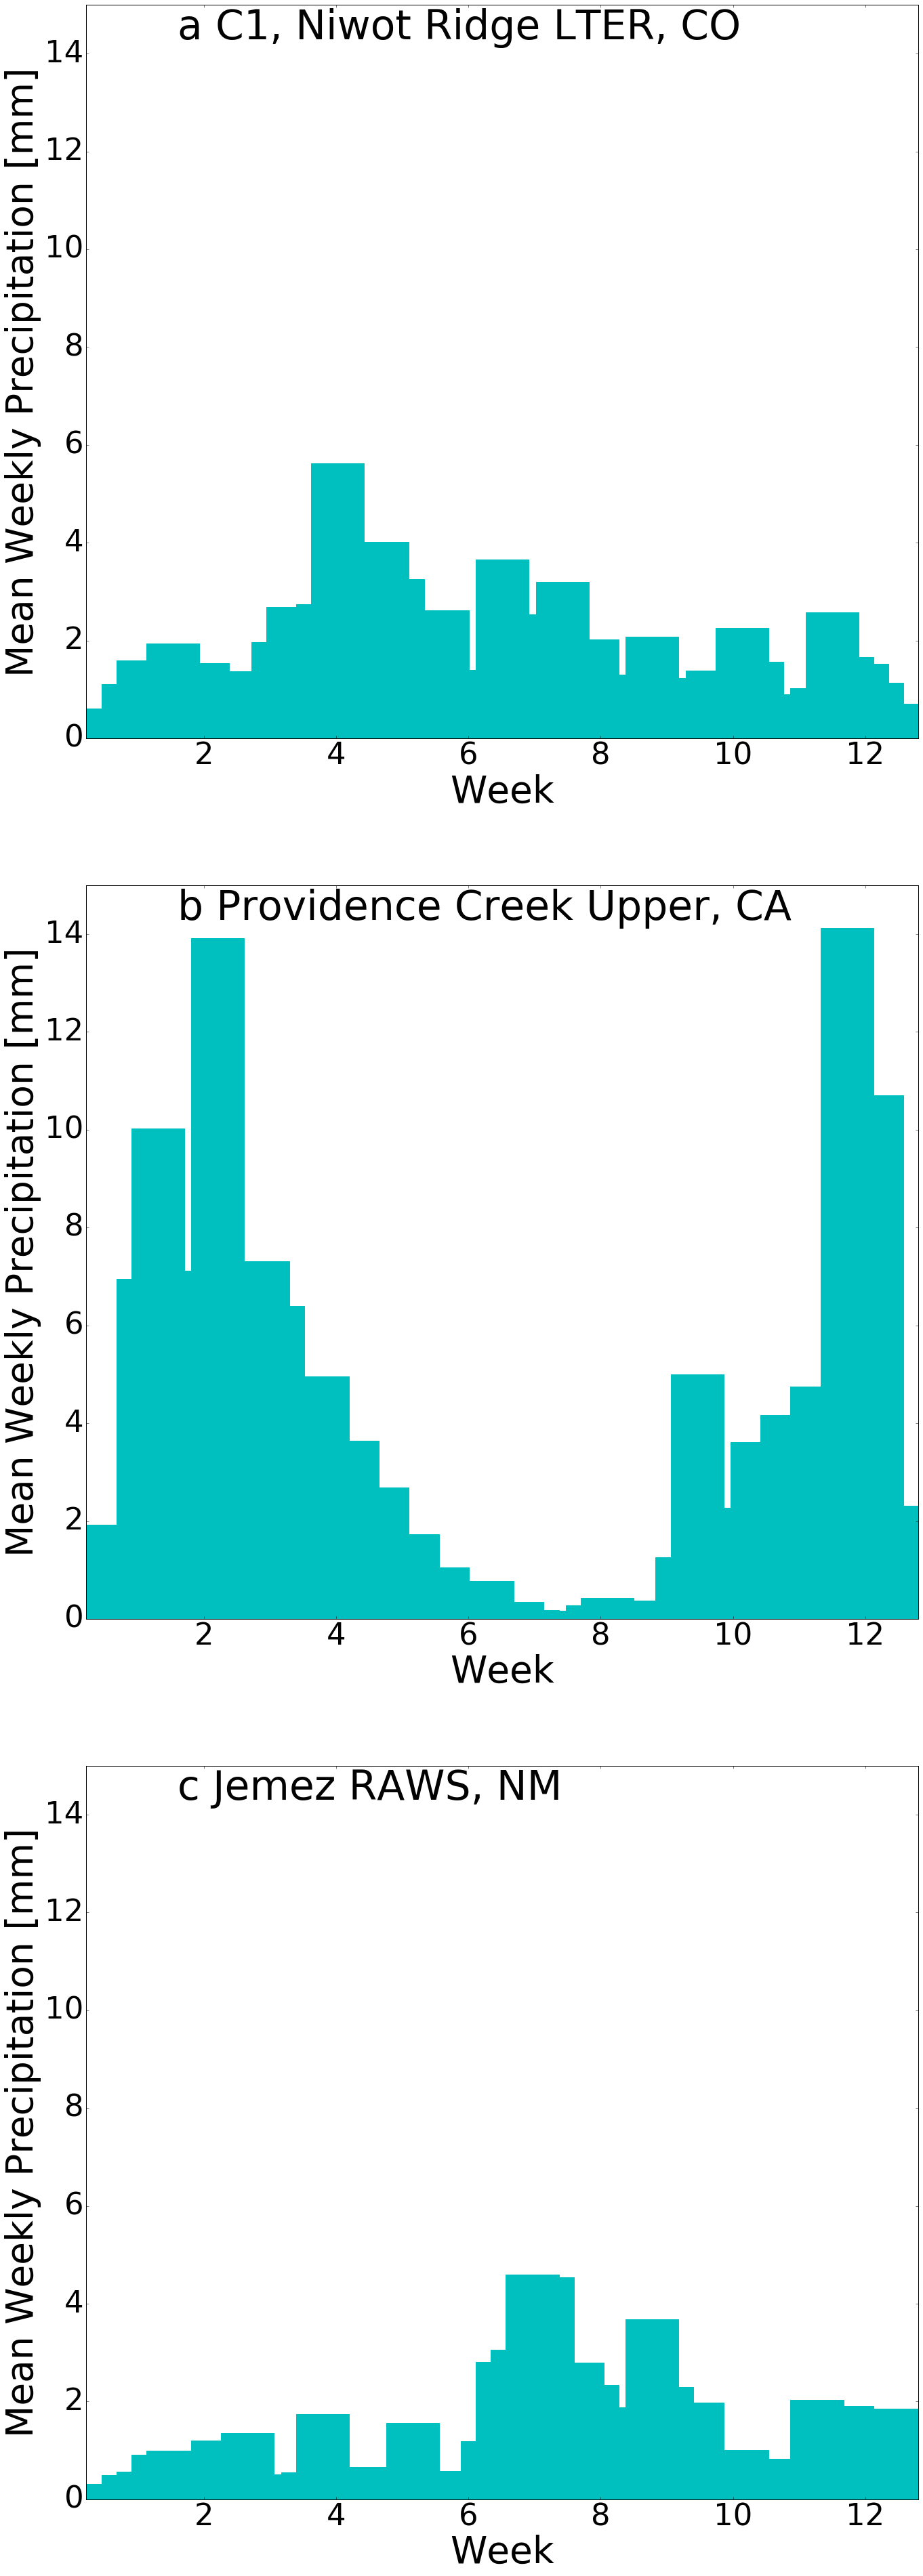

In [17]:
plt.figure(figsize= (22,66))
col = 'c'
axfont = 45

ylim = 15

plt.subplot(3,1,1)
plt.bar(cc2.month,cc2.P,edgecolor = col, facecolor = col);
plt.axis('tight')
plt.ylim([0,ylim])
plt.text(1.6,14.3,'a C1, Niwot Ridge LTER, CO', fontsize = 60)
ax1 = plt.gca();
plt.setp(ax1.get_xticklabels(), fontsize=axfont);
plt.setp(ax1.get_yticklabels(), fontsize=axfont);
plt.ylabel('Mean Weekly Precipitation [mm]', fontsize = axfont+10);
plt.xlabel('Week', fontsize = axfont+10);


plt.subplot(3,1,2)
plt.bar(sl2.month,sl2.P_upper,edgecolor = col, facecolor = col);
plt.axis('tight')
plt.ylim([0,ylim])
plt.text(1.6,14.3,'b Providence Creek Upper, CA', fontsize = 60)
ax2 = plt.gca();
plt.setp(ax2.get_xticklabels(), fontsize=axfont);
plt.setp(ax2.get_yticklabels(), fontsize=axfont);
plt.ylabel('Mean Weekly Precipitation [mm]', fontsize = axfont+10);
plt.xlabel('Week', fontsize = axfont+10);

plt.subplot(3,1,3)
plt.bar(jmz2.month,jmz2.P,edgecolor = col, facecolor = col);
plt.axis('tight')
plt.ylim([0,ylim])
plt.text(1.6,14.3,'c Jemez RAWS, NM', fontsize = 60)
ax2 = plt.gca();
plt.setp(ax2.get_xticklabels(), fontsize=axfont);
plt.setp(ax2.get_yticklabels(), fontsize=axfont);
plt.ylabel('Mean Weekly Precipitation [mm]', fontsize = axfont+10);
plt.xlabel('Week', fontsize = axfont+10);

#plt.savefig('./figures/cc_p301_JMZ_P_climatology.pdf',transparent = True, bbox_inches = 'tight')
#plt.savefig('./figures/cc_p301_JMZ_P_climatology.png',dpi=300, bbox_inches = 'tight')

In [18]:
cc2.head()

,P,Qual_days,flag,month
1,0.611111,1.0,NaN,0.226449
2,1.114286,1.0,NaN,0.452899
3,1.600000,1.0,NaN,0.679348
4,1.176471,1.0,NaN,0.905797
5,1.942857,1.0,NaN,1.132246


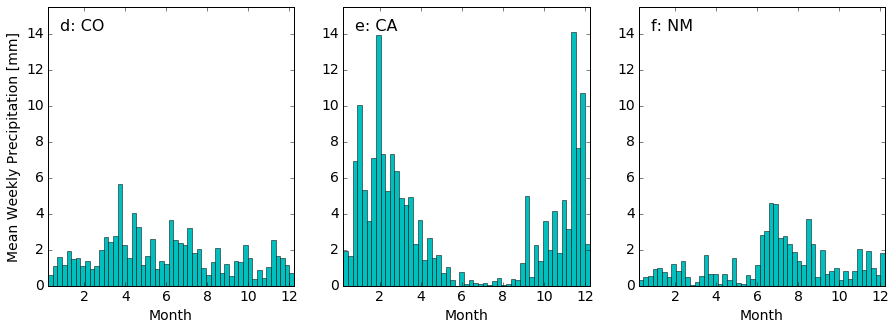

In [19]:
plt.figure(figsize= (15,5))
facecol = 'c'
edgecol = 'k'
axfont = 14

ylim = 15.5
yloc = 14.2
xloc = 0.8

plt.subplot(1,3,1)
plt.bar(cc2.month,cc2.P,width=1/4.416,edgecolor = edgecol, facecolor = facecol, linewidth=0.5);
plt.axis('tight')
plt.ylim([0,ylim])
plt.text(xloc,yloc,'d: CO', fontsize = axfont+2)
ax1 = plt.gca();
#ax1.set_xticklabels()
plt.setp(ax1.get_xticklabels(), fontsize=axfont);
plt.setp(ax1.get_yticklabels(), fontsize=axfont);
plt.ylabel('Mean Weekly Precipitation [mm]', fontsize = axfont);
plt.xlabel('Month', fontsize = axfont);


plt.subplot(1,3,2)
plt.bar(sl2.month,sl2.P_upper,width=1/4.416,edgecolor = edgecol, facecolor = facecol, linewidth=0.5);
plt.axis('tight')
plt.ylim([0,ylim])
plt.text(xloc,yloc,'e: CA', fontsize = axfont+2)
ax2 = plt.gca();
plt.setp(ax2.get_xticklabels(), fontsize=axfont);
plt.setp(ax2.get_yticklabels(), fontsize=axfont);
#plt.ylabel('Mean Weekly Precipitation [mm]', fontsize = axfont);
plt.xlabel('Month', fontsize = axfont);

plt.subplot(1,3,3)
plt.bar(jmz2.month,jmz2.P,width=1/4.416,edgecolor = edgecol, facecolor = facecol, linewidth=0.5);
plt.axis('tight')
plt.ylim([0,ylim])
plt.text(xloc,yloc,'f: NM', fontsize = axfont+2)
ax2 = plt.gca();
plt.setp(ax2.get_xticklabels(), fontsize=axfont);
plt.setp(ax2.get_yticklabels(), fontsize=axfont);
#plt.ylabel('Mean Weekly Precipitation [mm]', fontsize = axfont);
plt.xlabel('Month', fontsize = axfont);

plt.savefig('./figures/cc_p301_JMZ_P_climatology.pdf',transparent = True, bbox_inches = 'tight')
plt.savefig('./figures/cc_p301_JMZ_P_climatology.png',dpi=300, bbox_inches = 'tight')

In [23]:
raws.P.describe()

count    2922.000000
mean        2.066554
std        44.427609
min         0.000000
25%         0.000000
50%         0.000000
75%         0.250000
max      2394.000000
Name: P, dtype: float64